In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
np.set_printoptions(precision=3)

## Variables numeric

In [24]:
diabetes = pd.read_csv('datasets/diabetes_processed.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [25]:
features_df = diabetes.drop('Outcome', axis=1)
target_df = diabetes['Outcome']
features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_features = scaler.fit_transform(features_df)

In [27]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns)
rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = scaler.fit(features_df)
standardized_features = scaler.transform(features_df)
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

In [29]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')
normalized_features = normalizer.fit_transform(features_df)
l1_normalized_features = pd.DataFrame(normalized_features,
                                     columns=features_df.columns)

In [30]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=float((features_df['Pregnancies']).mean()))
binarized_features = binarizer.fit_transform(features_df['Pregnancies'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.  1.  8.  1.  0.  5.  3. 10.  2.  8.  4. 10. 10.  1.  5.  7.  0.  7.
  1.  1.  3.  8.  7.  9. 11. 10.  7.  1. 13.  5.  5.  3.  3.  6. 10.  4.
 11.  9.  2.  4.  3.  7.  7.  9.  7.  0.  1.  2.  7.  7.  1.  1.  5.  8.
  7.  1.  7.  0.  0.  0.  2.  8.  5.  2.  7.  5.  0.  2.  1.  4.  2.  5.
 13.  4.  1.  1.  7.  5.  0.  2.  3.  2.  7.  0.  5.  2. 13.  2. 15.  1.
  1.  4.  7.  4.  2.  6.  2.  1.  6.  1.  1.  1.  0.  1.  2.  1.  1.  4.
  3.  0.  3.  8.  1.  4.  7.  4.  5.  5.  4.  4.  0.  6.  2.  5.  0.  1.
  3.  1.  1.  0.  4.  9.  3.  8.  2.  2.  0.  0.  0.  5.  3.  5.  2. 10.
  4.  0.  9.  2.  5.  2.  1.  4.  9.  1.  8.  7.  2.  1.  2. 17.  4.  7.
  0.  2.  0.  6.  3.  4.  4.  3.  6.  6.  2.  1.  2.  8.  6.  0.  5.  5.
  6.  0.  1.  5.  4.  7.  8.  1.  8.  5.  3.  9.  7. 11.  8.  5.  1.  3.
  4.  4.  0.  1.  0.  2.  6.  5.  8.  5.  1.  7.  2.  0.  7.  0.  9. 12.
  5.  6.  5.  5.  0.  2.  7.  7.  1.  1.  0.  3.  4.  0.  4.  6.  1.  4.
  3.  4.  7.  0.  9.  0.  1.  4.  3.  6.  2.  9. 10.  0.  9.  1.  9.  2.
  2.  0. 12.  1.  3.  2.  1. 11.  3.  3.  4.  3.  4.  5.  0.  2.  0.  2.
 10.  2.  3.  1. 13.  2.  7.  0.  5.  2.  0. 10.  7.  7.  2.  7.  5.  1.
  4.  5.  0.  0.  2.  1.  0.  6.  2.  0. 14.  8.  0.  2.  5.  5.  3.  2.
 10.  0.  0.  2.  6.  0.  2.  3.  7.  2.  3.  3.  3.  6.  4.  3.  0. 13.
  2.  1.  1. 10.  2.  6.  8.  2.  1. 12.  1.  0.  0.  5.  9.  7.  1.  1.
  1.  5.  8.  8.  1.  3.  3.  5.  4.  4.  3.  1.  3.  9.  1. 13. 12.  1.
  5.  5.  5.  4.  4.  5.  6.  0.  3.  1.  3.  0.  0.  2.  2. 12.  0.  1.
  4.  0.  1.  0.  1.  1.  1.  1.  5.  8.  5.  3.  1.  5.  1.  4.  4.  2.
  3.  0.  3.  3.  4.  6.  5.  9.  5.  2.  4.  0.  8.  1.  6.  1.  1.  1.
  0.  3.  1.  4.  1.  3.  1.  2.  0.  2.  8.  4.  0.  1.  0.  1.  2.  3.
  1.  2.  1.  0. 12.  5.  1.  6.  0.  2.  4.  8.  4.  0.  1.  0.  0.  0.
  1.  2.  0.  2.  2. 14.  1.  5. 10.  9.  9.  1.  8.  5. 10.  0.  0.  0.
  8.  6.  1.  0.  0.  7.  4.  0.  2.  7.  8.  4.  3.  0.  4.  0.  0.  0.
  1.  0.  4.  8.  2.  2.  4.  4.  3.  6.  5.  2.  7.  6.  2.  3.  6.  7.
  3. 10.  0.  1.  2.  8. 12.  0.  9.  2.  3.  3.  9.  7. 13.  6.  2.  3.
  6.  9.  3.  3.  1.  3.  0.  0.  2.  0.  1.  6.  1.  4.  0.  0.  0.  3.
  8.  3. 10.  4.  1.  8.  5.  4.  1.  4.  1.  3.  6.  1.  1.  7.  1.  8.
 11. 11.  6.  0.  1.  6.  0.  2.  1.  6.  4.  0.  3.  2.  3.  2.  1.  1.
  6.  2. 10.  2.  0.  6. 12.  8.  8.  1.  8.  6.  3.  0. 11.  2.  3.  2.
  6.  0.  0.  1.  1.  1.  1.  6.  1.  7.  4.  1.  1.  1.  0.  1.  3.  3.
  7.  6. 11.  3.  6.  2.  9.  0.  2.  2.  6.  0.  2.  4.  0.  0.  5.  4.
  7.  0.  2.  1. 10. 13.  5.  2.  7.  1.  0.  4.  6.  4.  3.  2.  1.  0.
 11.  0.  1.  1.  5.  2.  1.  2.  2.  1. 11.  3. 10.  1.  8.  9.  6.  1.
  4. 10.  6.  9.  6.  1. 10.  3.  8.  6.  9.  0.  3.  2.  2.  0.  0.  4.
  5.  2.  3.  1.  1.  1.  8. 13.  2.  7.  2.  7.  3.  0.  4.  4.  2.  6.
  1.  2.  4.  6. 10.  2.  9.  2.  3.  5. 10.  0.  3.  7.  3. 10.  1.  5.
  4.  1.  1.  5.  1.  4.  1.  0.  2.  2.  3.  8.  2.  2.  2.  4.  0.  8.
  2.  1. 11.  3.  1.  9. 13. 12.  1.  1.  3.  6.  4.  1.  3.  0.  8.  1.
  7.  0.  1.  6.  2.  9.  9. 10.  2.  5.  1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Variable categorical

In [56]:
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')
gosales.sample(5)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
59198,False,F,41,Unspecified,Hospitality
1685,False,F,22,Single,Retail
28017,True,F,43,Married,Executive
53413,False,M,42,Married,Professional
25447,False,M,27,Married,Sales


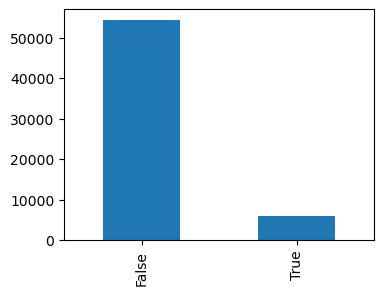

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

In [58]:
from sklearn import preprocessing
gender = ['M', 'F']
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(gender)
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [59]:
## No order in Categorie -> OneHotEncoder
one_hot_encoding = preprocessing.OneHotEncoder()
one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))